<a href="https://colab.research.google.com/github/chezyio/SC1015_Project/blob/main/SC1015_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>WHERE IS MY COMPLETED README.MD 😠 @YP</h1>

<img src='https://media.tenor.com/tpAq0K9SP5MAAAAC/red-panda-sleepy-eyes.gif'/>

<h1>Detecting Pneumonia</h1>
<div>
  <p>SC1015 Introduction to Data Science and Artificical Intelligence</p>
  <p>B137, Team 10</p>
  <table>
    <tr>
      <th>Name</th>
      <th>Email</th>
    </tr>
    <tr>
      <td>Terri Tan</td>
      <td>TTAN083@e.ntu.edu.sg</td>
    </tr>
    <tr>
      <td>Yanping Kung</td>
      <td>YKUNG001@e.ntu.edu.sg</td>
    </tr>
    <tr>
      <td>Chester Yee</td>
      <td>CYEE006@e.ntu.edu.sg</td>
    </tr>
  </table>
</div>

<h1>Preamble</h1>

<img src='https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/05/18/13/02/ww5r032t-8col-jpg.jpg'/>

 
<p>Pneumonia is an infection that inflames the air sacs in both lungs. It is one of the leading causes of death in Singapore and worldwide. Accounting for 20.7%, 18.8% and 18.4% of deaths in Singapore in 2019,2020 and 2021 respectively, according death statistics retrieve from HealthHub. As for worldwide, statistics has shown that 2.5 million people have died from pneumonia in 2019.</p> 
<br>
<p>Pneumonia can be caused by viral, bacterial and fungi infections. Common pneumonia infections are contagious and can spread from person to person or through the contact with surfaces or objects that are contaminated by the bacteria or viruses. One example of a viral infections that can cause pneumonia which is common now is the coronavirus infection </p>
<br>
<p> However upon proper detection and treatment, many cases of pneumonia can be cleared without complications. One of the effective ways to identify signs of an inflammation will be Chest X-ray. Through x-rays, doctors will also be able to know the location and extent of this inflammation. </p>
<br>
<p> Mild cases of pneumonia can be effectively treated with antibiotics, antiviral drugs, or antifungal medications. However, if the patient has any underlying health conditions, hospitalization may be necessary, and they may require respiratory and oxygen therapy in addition to antibiotic injections.  </p>

<br>
<p> With statistics in Singapore showing that roughly 11,000 patients is admitted to hospitals with pneumonia and comparing it with the number of death caused by pneumonia in 2021. We can see that about 6000 patients recovers from pneumonia per year </p> 


<h1>Problem Statement</h1>
<p>How might we detect pneumonia for doctors in order to increase the efficiency and accuracy of diagnosis?</p>



<h1>Initialization</h1>
<p>Install required libraries on Google Colab workspace</p>


In [ ]:
%%capture
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install keras
!pip install -q kaggle

<h1>Import Libraries</h1>
<p>Import libraries after installation</p>

In [ ]:
# General
import pandas as pd
import numpy as np
from numpy import asarray

# Directory 
import os
from google.colab import files

# Visualisation
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from PIL import Image

# Deep Learning
import keras
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout, GlobalAveragePooling2D, BatchNormalization, RandomFlip, RandomRotation, Resizing
from keras.models import Sequential, load_model, Model
from keras.applications.densenet import DenseNet121
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.losses import CategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Kaggle API Key 
os.environ['KAGGLE_USERNAME'] = "territellis"
os.environ['KAGGLE_KEY'] = "c9fcf5c0a806a25124e165d1530b3d75"

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:19<00:00, 113MB/s] 
100% 2.29G/2.29G [00:19<00:00, 123MB/s]


In [ ]:
%%capture
!unzip chest-xray-pneumonia.zip -d chest_xray

<h1>Exploratory Data Analysis</h1>


<div>
  <h4>Exploring the number of images in train, test and validation folders</h4>
  <p>For the exploratory data analysis, we have a total of three different dataset for the train, test and val data. 
In the train data, we have a total of 5216 data with 1341 normal images and 3875 pneumonia images. For the test data, there's a total of 624 data with 234 normal images and 390 pneumonia images. Lastly, for the validation data, there's a total of 16 data with 8 normal and 8 pneumonia images.

</p>

</div>

<br/>

<div>
  <h4>Exploring the pixel intensity distribution</h4>
  <p>Normal has more pixels that are more spread out across high to low pixel intensity. Pneumonia has more pixels that are of high pixel intensity resulting in pneumonia being present. This means that if pneumonia is present in the x-ray film, the pixel intensity is supposedly higher and the spread of the pixels should be smaller and closer together. 
</p>

</div>

<br/>



<div>
  <h4>Applying canny edge detection</h4>
  <p>The use of canny edge detection can be useful in extracting structural information from different objects and dramatically reduce the amount of data to be processed. From the normal canny images, we can see that the entire outline of the ribcage is visible and big patches of dots are not seen in the images. From the pneumonia canny images, we can see that the outline of the ribcage are less obvious as compared to the normal and big patches of dots can be easily seen in some images.
</p>

<br/>

</div>
<div>
  <h4>Tackling class imbalance</h4>
  <p>Weighted loss function is a technique that can be used to address the issue of class imbalance in binary classification problems. In this case, for our train dataset, the number of pneumonia images is significantly greater than that of the normal images, which can cause the model to have poor performance on the minority class.
</p>

</div>







In [ ]:
train = './chest_xray/chest_xray/train/'
test = './chest_xray/chest_xray/test/'
val = './chest_xray/chest_xray/val/'

trainN = train + 'NORMAL/'
trainP = train + 'PNEUMONIA/'
trainN_num = len(os.listdir(trainN))
trainP_num = len(os.listdir(trainP))
train_total = trainN_num + trainP_num
print('Train (Normal): ', trainN_num)
print('Train (Pneumonia): ', trainP_num)
print('Train (Total): ', train_total)


testN = test + 'NORMAL/'
testP = test + 'PNEUMONIA/'
testN_num = len(os.listdir(testN))
testP_num = len(os.listdir(testP))
test_total = testN_num + testP_num
print('Test (Normal): ', testN_num)
print('Test (Pneumonia): ', testP_num)
print('Test (Total): ', test_total)


valN = val + 'NORMAL/'
valP = val + 'PNEUMONIA/'
valN_num = len(os.listdir(valN))
valP_num = len(os.listdir(valP))
val_total = valN_num + valP_num
print('Validation (Normal): ', valN_num)
print('Validation (Pneumonia): ', valP_num)
print('Validation (Total): ', val_total)


p = os.listdir(trainP)
p_dir = trainP

n = os.listdir(trainN)
n_dir = trainN

Train (Normal):  1341
Train (Pneumonia):  3875
Train (Total):  5216
Test (Normal):  234
Test (Pneumonia):  390
Test (Total):  624
Validation (Normal):  8
Validation (Pneumonia):  8
Validation (Total):  16


Pneumonia


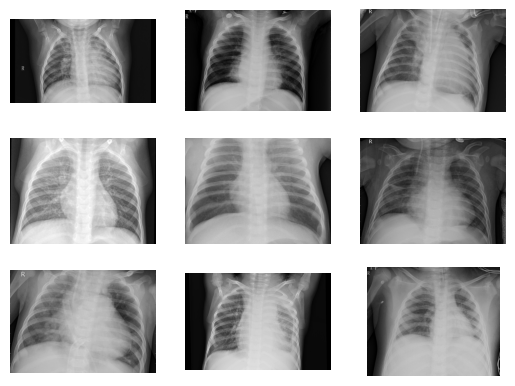

In [ ]:
print('Pneumonia')
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(p_dir, p[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

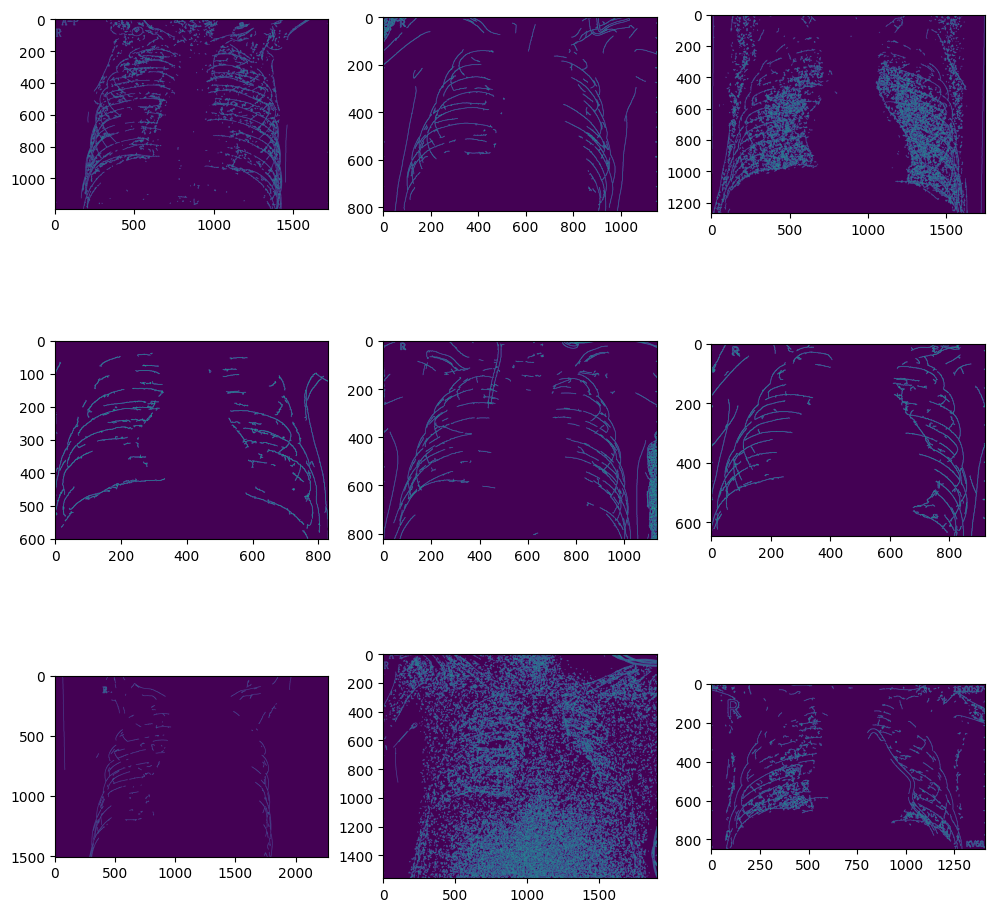

In [ ]:
fig = plt.figure(figsize = (12, 12))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(os.path.join(p_dir, p[i]))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detected_edges = cv2.Canny(gray, 40, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(detected_edges)

Normal


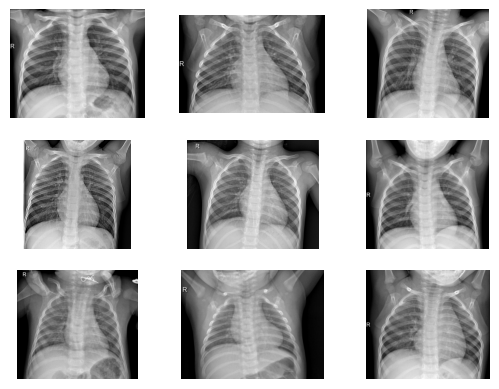

In [ ]:
print('Normal')
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(n_dir, n[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

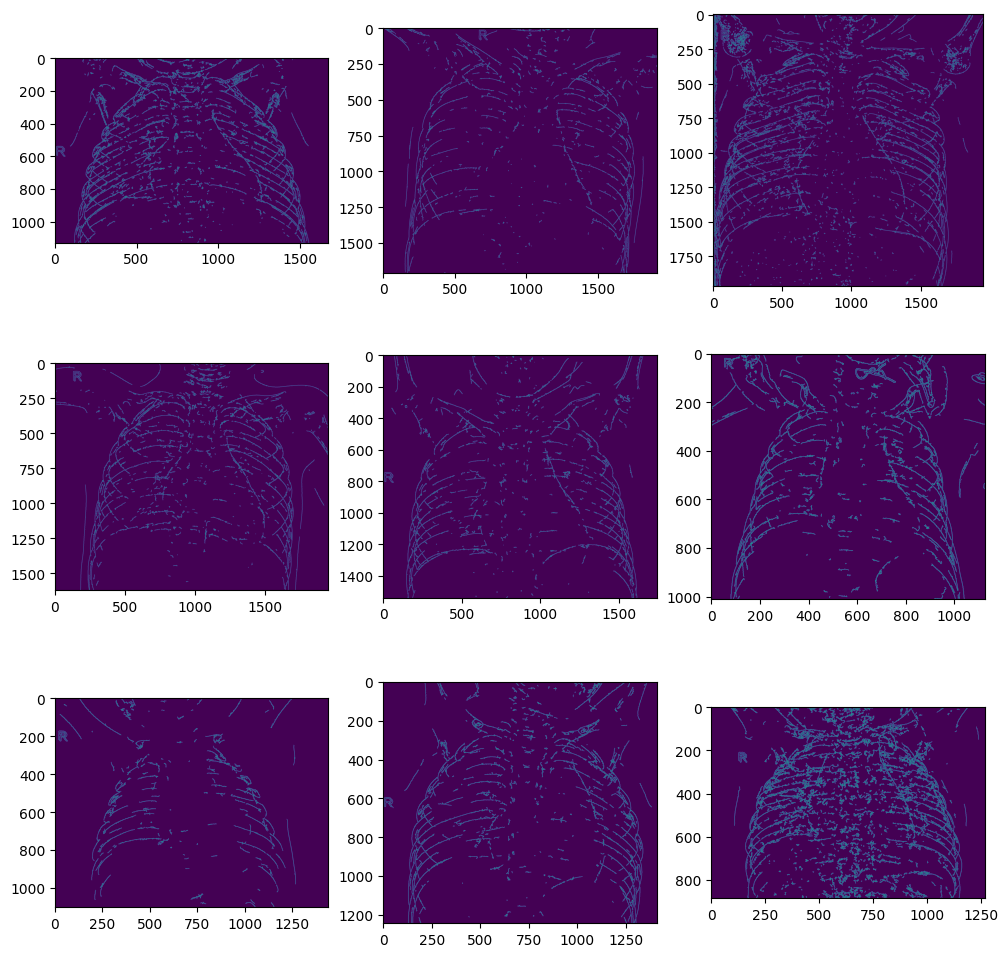

In [ ]:
fig = plt.figure(figsize = (12, 12))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(os.path.join(n_dir, n[i]))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detected_edges = cv2.Canny(gray, 40, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(detected_edges)

Normal: The mean value of the pixels is 111.1970 and the standard deviation is 66.3787
Pneumonia: The mean value of the pixels is 156.6424 and the standard deviation is 57.2312


Text(0.5, 1.0, 'Pneumonia')

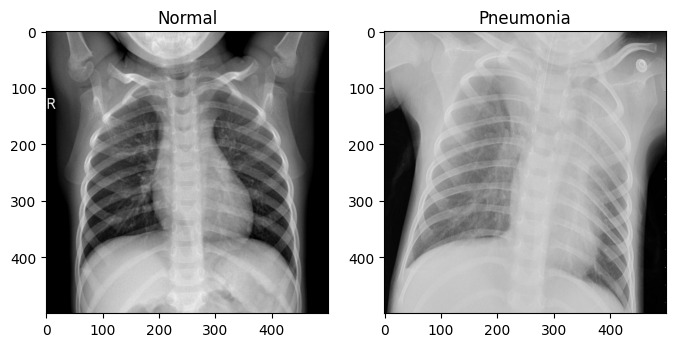

In [ ]:
# Get a random Image and load it
def randomImage(trainSet):
  rand_norm = np.random.randint(0,len(os.listdir(trainSet)))
  pic = os.listdir(trainSet)[rand_norm]
  pic_add = trainSet+pic
  
  # Load images
  load_image = Image.open(pic_add)

  return load_image

# Get a Random Image Address
def randomImage_address(trainSet):
  rand_norm = np.random.randint(0,len(os.listdir(trainSet)))
  pic = os.listdir(trainSet)[rand_norm]
  pic_add = trainSet+pic
  return pic_add

fig, axarr = plt.subplots(1, 2, figsize=(8,5))
# Plot Normal Xray
img1 = cv2.imread(randomImage_address(trainN))
img1 = cv2.resize(img1, (500, 500))
print(f"Normal: The mean value of the pixels is {img1.mean():.4f} and the standard deviation is {img1.std():.4f}")
axarr[0].imshow(img1, cmap='gray')
axarr[0].set_title('Normal')


# Plot Pneumonia Xray
img2 = cv2.imread(randomImage_address(trainP))
img2 = cv2.resize(img2, (500, 500))
print(f"Pneumonia: The mean value of the pixels is {img2.mean():.4f} and the standard deviation is {img2.std():.4f}")
axarr[1].imshow(img2, cmap='gray')
axarr[1].set_title('Pneumonia')


In [ ]:
# Get a image and load it
def image(trainSet):
  pic = os.listdir(trainSet)[6]
  pic_add = trainSet+pic
  # Load images
  load_image = Image.open(pic_add)
  return load_image

# Distribution plot for the train and test set image pixels
def distPlot(trainNSet, trainPSet):
  fig, axes = plt.subplots(1, 2, figsize=(12,4))
  # For the normal:
  load_imageN = image(trainNSet)
  load_arrayN = asarray(load_imageN)
  sns.distplot(load_arrayN.ravel(),
              label=f"Pixel Mean {np.mean(load_imageN):.3f} & Standard Deviation {np.std(load_imageN):.3f}", 
              kde=False, ax=axes[0])
  axes[0].legend(loc='upper right')
  axes[0].set(xlabel='Pixel Intensity', ylabel='# Pixels in Image', title='Normal')

  # For Pneumonia:
  load_imageP = image(trainPSet)
  load_arrayP = asarray(load_imageP)
  sns.distplot(load_arrayP.ravel(),
              label=f"Pixel Mean {np.mean(load_imageP):.3f} & Standard Deviation {np.std(load_imageP):.3f}", 
              kde=False, ax=axes[1], color="orange")
  axes[1].legend(loc='upper right')
  axes[1].set(xlabel='Pixel Intensity', ylabel='# Pixels in Image', title='Pneumonia')

<ipython-input-15-fdcbca030e8a>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(load_arrayN.ravel(),
<ipython-input-15-fdcbca030e8a>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(load_arrayP.ravel(),


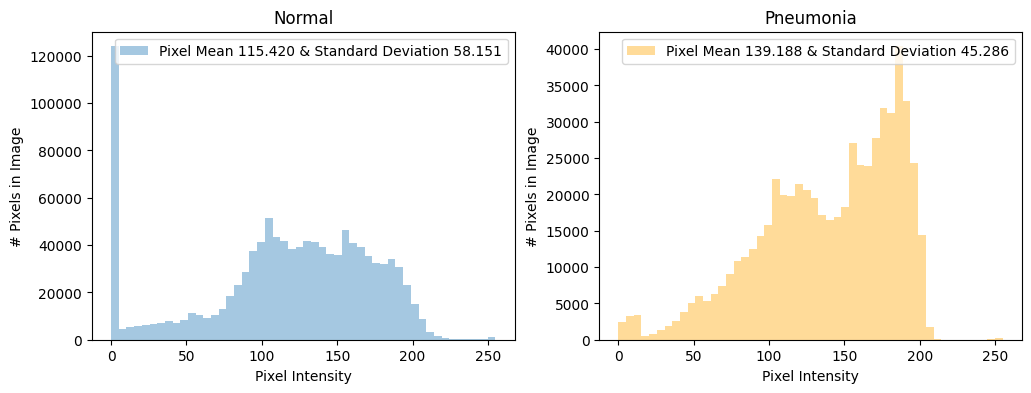

In [ ]:
distPlot(trainN, trainP)

Based on the distplot above, we could tell from the pixel mean that the image with pneumonia has a higher pixel mean as compared to the normal image, where the pixels are more spread out across high to low pixel intensity. This means that the image with pneumonia has more pixels that are of high pixel intensity resulting in pneumonia being present in the x-ray film.

There are 5216 images in the training dataset
There are 624 images in the test dataset
There are 16 images in the validation dataset


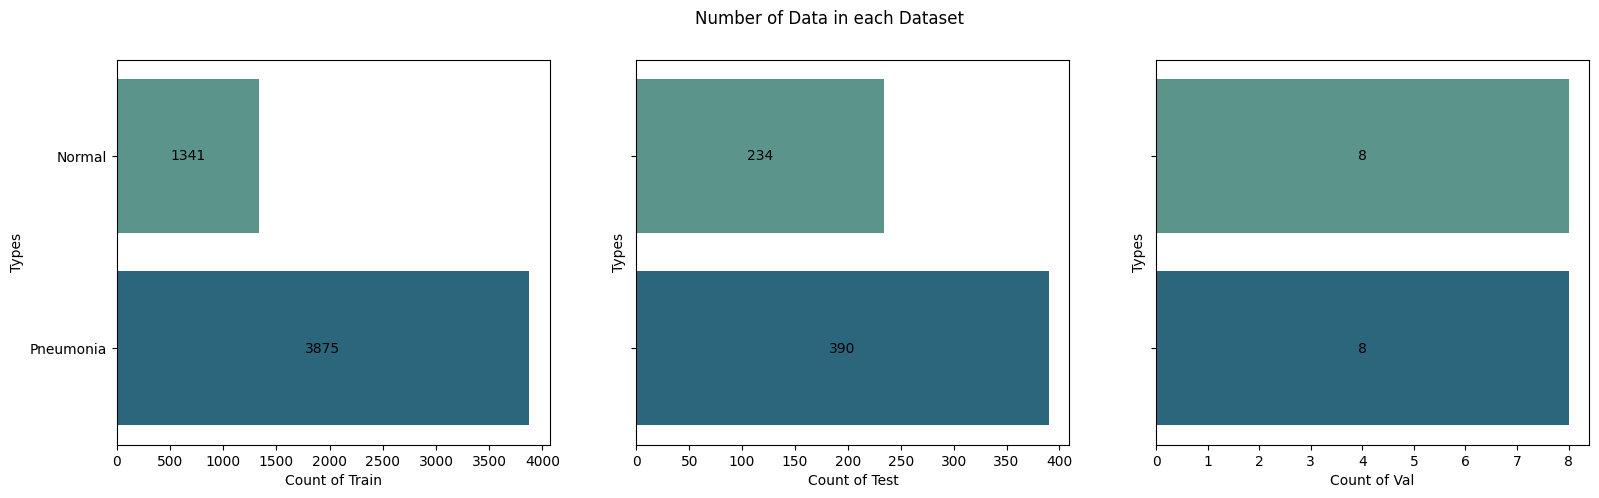

In [ ]:
# Create the Balance Data (Taken from train)
p_balanceList = []
n_balanceList = []
all_balanceList = []
for i in range(1341):
  img = randomImage_address(trainP)
  p_balanceList.append(img)
  all_balanceList.append(img)

  pic = os.listdir(trainN)[i]
  pic_add = trainN+pic
  n_balanceList.append(pic_add)
  all_balanceList.append(img)


print("There are {} images in the training dataset".format(len(os.listdir(trainN) + os.listdir(trainP))))
print("There are {} images in the test dataset".format(len(os.listdir(testN) + os.listdir(testP))))
print("There are {} images in the validation dataset".format(len(os.listdir(valN) + os.listdir(valP))))

# For Train
n_count = len(os.listdir(trainN))
p_count = len(os.listdir(trainP))
trainDF = pd.DataFrame({'Types': ['Normal', 'Pneumonia'], 'Count of Train':[n_count, p_count]})

# For Test
n_countTest = len(os.listdir(testN))
p_countTest = len(os.listdir(testP))
testDF = pd.DataFrame({'Types': ['Normal', 'Pneumonia'], 'Count of Test':[n_countTest, p_countTest]})

# For Val
n_countVal = len(os.listdir(valN))
p_countVal = len(os.listdir(valP))
valDF = pd.DataFrame({'Types': ['Normal', 'Pneumonia'], 'Count of Val':[n_countVal, p_countVal]})

fig, axes = plt.subplots(1,3, figsize=(19,5), sharey=True)
fig.suptitle('Number of Data in each Dataset')

ax1 = sns.barplot(ax=axes[0], x=trainDF['Count of Train'], y=trainDF['Types'], orient='h', palette='crest')
ax2 = sns.barplot(ax=axes[1], x=testDF['Count of Test'], y=testDF['Types'], orient='h', palette='crest')
ax3 = sns.barplot(ax=axes[2], x=valDF['Count of Val'], y=valDF['Types'], orient='h', palette='crest')

for i in ax1.containers:
  ax1.bar_label(i,label_type='center')

for i in ax2.containers:
  ax2.bar_label(i,label_type='center')

for i in ax3.containers:
  ax3.bar_label(i,label_type='center')

plt.show()

In [ ]:
# weighted loss function to tackle class imbalance issue
weight_for_0 = p_count / (n_count + p_count)
weight_for_1 = n_count / (n_count + p_count)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

<h1>Image Processing</h1>

<p>Performing some basic image transformation</p>


<ul>
  <li>Rotate</li>
  <li>Width Shift</li>
  <li>Shear</li>
  <li>Zoom</li>
  <li>Center</li>
  <li>Standard Normalization</li>
</ul>


<p>We found out that by introducing some form of randomness into dataset can lead to better accuracy</p>


<p>Besides, we have to scale down the images to 64x64 pixels in view of reosurce constraints.</p>



In [ ]:
image_generator = ImageDataGenerator(
    zoom_range=0.1,
    shear_range=0.1,
    rotation_range=20,
    width_shift_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train_ds = image_generator.flow_from_directory(train, 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(64, 64))

val_ds = image_generator.flow_from_directory(val, 
                                                batch_size=32, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(64, 64))

test_ds = image_generator.flow_from_directory(test, 
                                            batch_size=32, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(64, 64))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


<p>This is a processed image of a normal lungs that is scaled down to 64x64, which will be used for processing. Scaling down of the image is needed as larger scaled image requires for more processing time, hence by scaling down it reduces the time taken to process all the images.</p>

The dimensions of the image are 64 pixels width and 64 pixels height, one single color channel.
The maximum pixel value is 3.1484 and the minimum is -3.3315
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


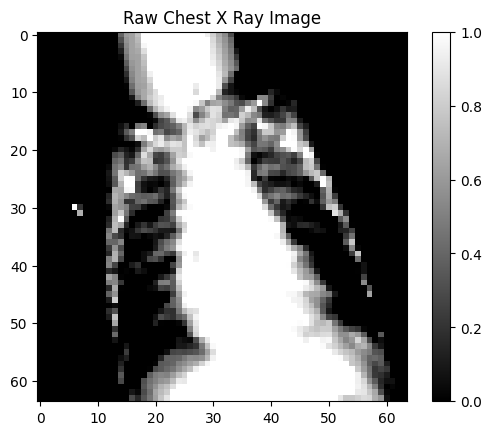

In [ ]:
generated_image, label = train_ds.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

<ipython-input-17-13aaea737e44>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(), label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)


Text(0, 0.5, '# Pixels in Image')

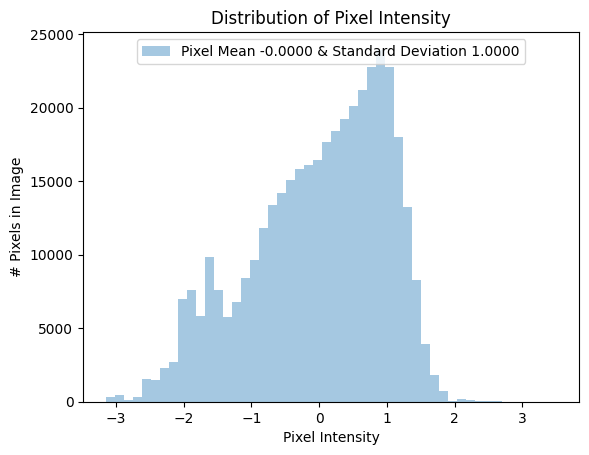

In [ ]:
sns.distplot(generated_image.ravel(), label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensity')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')


# sns.distplot(load_arrayP.ravel(),
#               label=f"Pixel Mean {np.mean(load_imageP):.3f} & Standard Deviation {np.std(load_imageP):.3f}", 
#               kde=False, ax=axes[1], color="orange")

<h1>Convolutional Neural Network (CNN)</h1>

<p>CNN is a type of neural network that are specifically designed for processing data that has a grid-like structure, such as images, video, and audio. CNNs are commonly used for image classification, object detection, and segmentation tasks.</p>

<p>CNNs are trained using backpropagation and stochastic gradient descent to minimize a loss function. During training, the weights of the filters and the fully connected layers are updated iteratively to improve the network's performance.</p>

<p>The three main types of layers in a CNN are:</p>


<h4>Convolutional Layers</h4>
<p>Convolutional layers apply a set of learnable filters to the input data to extract features that are important for the task at hand. Each filter slides over the input data and performs element-wise multiplication followed by summation to produce a single value, which is then passed through an activation function. The output of a convolutional layer is a set of feature maps that represent different aspects of the input data.</p>

<br>

<h4>Pooling Layers</h4>
<p>These layers downsample the feature maps by taking the maximum, average, or other function of a local region. This reduces the dimensionality of the feature maps while retaining the important information.</p>

<br>

<h4>Fully Connected Layers</h4>
<p>Fully Connected layers perform a classification task on the features extracted by the previous layers. Each neuron in a fully connected layer is connected to all the neurons in the previous layer.</p>

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vkQ0hXDaQv57sALXAJquxA.jpeg'>


<img src='https://miro.medium.com/v2/resize:fit:1052/1*GcI7G-JLAQiEoCON7xFbhg.gif'>

<img src='https://miro.medium.com/v2/resize:fit:1192/format:webp/1*KQIEqhxzICU7thjaQBfPBQ.png'>



<h1>CNN — Model Architecture</h1>

In [ ]:
model_balanced = Sequential([
  Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2)),

  Conv2D(64, (3, 3), activation="relu"),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2)),

  Conv2D(128, (3, 3), activation="relu"),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2)),

  Flatten(),

  Dense(activation = 'relu', units = 128),
  Dense(1, activation='sigmoid')])

model_balanced.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_balanced.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                      

<h1>CNN — Train Model</h1>
<p>After modelling the CNN architecture, we proceed to train our model with the weighted loss function to reduce biasness using 10 epochs of forward and backpropagation.


In [ ]:
h1_balanced = model_balanced.fit(
  train_ds,
  validation_data=val_ds,
  class_weight=class_weight,
  epochs=10
)

Epoch 1/10
163/163 [==============================] - 116s 695ms/step - loss: 0.1365 - accuracy: 0.8928 - val_loss: 9.5342 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 111s 677ms/step - loss: 0.0686 - accuracy: 0.9319 - val_loss: 1.4679 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 121s 741ms/step - loss: 0.0531 - accuracy: 0.9440 - val_loss: 1.6452 - val_accuracy: 0.5625
Epoch 4/10
163/163 [==============================] - 136s 831ms/step - loss: 0.0490 - accuracy: 0.9482 - val_loss: 0.3952 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 139s 846ms/step - loss: 0.0437 - accuracy: 0.9569 - val_loss: 0.4511 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 134s 820ms/step - loss: 0.0414 - accuracy: 0.9588 - val_loss: 0.5838 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 153s 941ms/step - loss: 0.0399 - accuracy: 0.9599 - val_loss: 1.3916 -

<h1>CNN — Evaluate Model</h1>
<p>Based on the perfomance of model, we can deduce that the CNN model is rather accurate as the validation accuracy is closely follows the training accuracy. When comparing the training and validation loss, it also shows that the validation loss closely follows the training loss overtime. In order to maximise the training and validation accuracy, we have tuned several hyperparameter and this was the result. When tuning the hyperparameters, we were also mindful of the fact that over tuning the model could result in overfitting and under tuning the model could result in underfitting.</p> 

Text(0.5, 1.0, 'Accuracy Evolution')

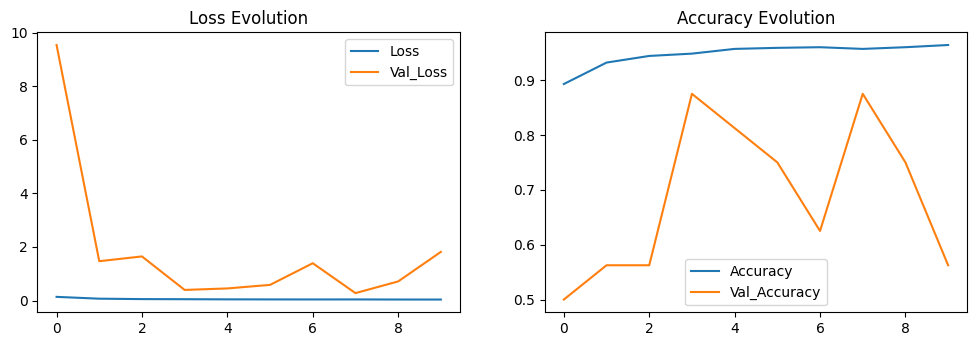

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 2)
plt.plot(h1_balanced.history['accuracy'], label='Training Accuracy')
plt.plot(h1_balanced.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 1)
plt.plot(h1_balanced.history['loss'], label='Training Loss')
plt.plot(h1_balanced.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

<h1>CNN — Validate Model</h1>
<p>Having evaluated our model, we ran our model against unseen validation data to ensure that our model is performing to a certain degree of accuracy.</p>

In [ ]:
evaluation = model_balanced.evaluate(train_ds)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_balanced.evaluate(test_ds)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 8s 360ms/step - loss: 0.8227 - accuracy: 0.7901
Test Accuracy: 79.01%
163/163 [==============================] - 87s 532ms/step - loss: 0.0950 - accuracy: 0.9657
Train Accuracy: 96.57%


<h1>CNN — Test Model</h1>
Another metric which we have explored is the F1 score. F1 score is a metric commonly used to evaluate the performance of a binary classification model. It is the harmonic mean of precision and recall, two other commonly used metrics.

Precision measures the proportion of true positive predictions out of all positive predictions, while recall measures the proportion of true positive predictions out of all actual positive cases.

The F1 score provides a single number that balances both precision and recall, and it ranges from 0 to 1, with a higher value indicating better model performance. 

In this case, we have an F1 score of 0.852, which shows that the DenseNet model is classifying the images rather accurately. The expression pred > 0.5 is used to convert the predicted probability values into binary labels by thresholding at 0.5. If the predicted probability is greater than 0.5, it is classified as 1, otherwise as 0.



In [ ]:
pred = model_balanced.predict(test_ds)

print(confusion_matrix(test_ds.classes, pred > 0.5))
pd.DataFrame(classification_report(test_ds.classes, pred > 0.5, output_dict=True))

20/20 [==============================] - 11s 511ms/step
[[103 131]
 [  3 387]]


,0,1,accuracy,macro avg,weighted avg
precision,0.971698,0.747104,0.785256,0.859401,0.831327
recall,0.440171,0.992308,0.785256,0.716239,0.785256
f1-score,0.605882,0.852423,0.785256,0.729153,0.759970
support,234.000000,390.000000,0.785256,624.000000,624.000000


<h1>Densely Connected Convolutional Network (DenseNet)</h1>

<img src='https://pytorch.org/assets/images/densenet1.png' />

<p>
DenseNet is a type of CNN that emphasizes feature reuse and encourages the flow of information across different layers of the network. DenseNet also require fewer parameters as compared to CNN as there is no need to learn redundant feature maps.

The basic idea behind DenseNet is to connect all layers in a feed-forward fashion. Unlike traditional CNNs, which stack convolutional layers on top of each other, DenseNet connects each layer to every other layer in a feed-forward fashion. In this way, each layer receives information not only from the preceding layer but also from all the preceding layers in the network.

DenseNet also incorporates a technique called "feature concatenation", which involves concatenating the feature maps produced by each layer before passing them on to the next layer. This encourages the network to reuse features from earlier layers, which can help to reduce the number of parameters required and improve performance.


</p>


<p>We have chosen DenseNet121 for a basic comparison between the state-of-the-art CNN architecture and the primitive implementation of a basic CNN.</p>

</table>

<h1>DensetNet — Model Architecture</h1>

<p>To fine-tune the pre-trained model for our specific task, the first 101 layers of the pre-trained model are frozen by setting their trainable attribute to False. This allows only the remaining layers, starting from layer 101, to be trained during the fine-tuning process. This also helps prevent overfitting of the model.</p>

In [ ]:
lrs = tf.keras.callbacks.ReduceLROnPlateau()
int_lr = 0.0001
epoch = 10
batch_size = 32

# Early Stopping helps to stop the training process when the model stops improving. This is to reduce the amount of time needed to train over nuance changes in the model. 
early_stoppage = EarlyStopping(monitor='val_loss', patience=10)

# DenseNet Model
densed_model = DenseNet121(include_top=False,input_tensor= tf.keras.Input(shape=(64,64,3)), weights='imagenet')

# Freeze the layers
for layer in densed_model.layers[:101]:    
    layer.trainable = False

for layer in densed_model.layers[101:]:  
    layer.trainable = True

model2_balanced = tf.keras.Sequential()
model2_balanced.add(densed_model)
model2_balanced.add(Flatten())
model2_balanced.add(Dense(128, activation='relu'))
model2_balanced.add(Dense(1, activation='sigmoid'))


model2_balanced.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model2_balanced.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               524416    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7,562,049
Trainable params: 6,636,865
Non-trainable params: 925,184
_________________________________________________________________


<h1>DensetNet — Train Model</h1>

In [ ]:
h2_balanced = model2_balanced.fit(train_ds, epochs=epoch, validation_data=val_ds, callbacks=[early_stoppage,lrs])

model2_balanced.save('./model/denseNet121/denseNetModel.h5')
model2_balanced.save_weights('./model/denseNet121/denseNetWeights.h5')

Epoch 1/10
163/163 [==============================] - 300s 2s/step - loss: 0.2201 - accuracy: 0.9289 - val_loss: 0.4528 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 232s 1s/step - loss: 0.0986 - accuracy: 0.9640 - val_loss: 1.7428 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 228s 1s/step - loss: 0.0838 - accuracy: 0.9693 - val_loss: 0.1492 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 237s 1s/step - loss: 0.0638 - accuracy: 0.9776 - val_loss: 0.3524 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 230s 1s/step - loss: 0.0605 - accuracy: 0.9780 - val_loss: 0.3128 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - 234s 1s/step - loss: 0.0608 - accuracy: 0.9778 - val_loss: 0.5625 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/10
163/163 [==============================] - 240s 1s/st

<h1>DensetNet — Evaluate Model</h1>

<p>Based on the perfomance of model, we can deduce that the DenseNet model is slighty more accurate as comapred to the CNN model above.</p> 

Text(0.5, 1.0, 'Training and Validation Loss')

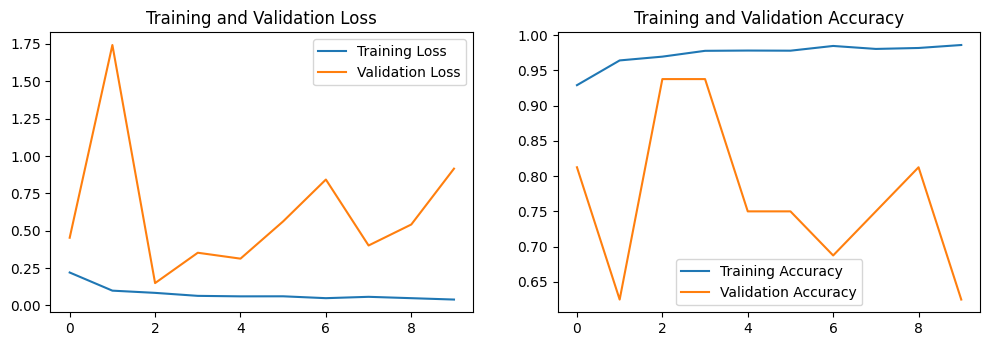

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 2)
plt.plot(h2_balanced.history['accuracy'], label='Training Accuracy')
plt.plot(h2_balanced.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 1)
plt.plot(h2_balanced.history['loss'], label='Training Loss')
plt.plot(h2_balanced.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

<h1>DenseNet — Validate Model</h1>
<p>Having evaluated our model, we ran our model against unseen validation data to ensure that our model is performing to a certain degree of accuracy</p>

In [ ]:
evaluation = model2_balanced.evaluate(train_ds)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model2_balanced.evaluate(test_ds)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

163/163 [==============================] - 120s 732ms/step - loss: 0.0402 - accuracy: 0.9852
Train Accuracy: 98.52%
20/20 [==============================] - 13s 630ms/step - loss: 0.9870 - accuracy: 0.8013
Test Accuracy: 80.13%


<h1>DenseNet — Test Model</h1>

Another metric which we have explored is the F1 score. F1 score is a metric commonly used to evaluate the performance of a binary classification model. It is the harmonic mean of precision and recall, two other commonly used metrics.

Precision measures the proportion of true positive predictions out of all positive predictions, while recall measures the proportion of true positive predictions out of all actual positive cases.

The F1 score provides a single number that balances both precision and recall, and it ranges from 0 to 1, with a higher value indicating better model performance. 

In this case, we have an F1 score of 0.863, which shows that the DenseNet model is classifying the images rather accurately. The expression pred > 0.5 is used to convert the predicted probability values into binary labels by thresholding at 0.5. If the predicted probability is greater than 0.5, it is classified as 1, otherwise as 0.

In [ ]:
pred = model2_balanced.predict(test_ds)

print(confusion_matrix(test_ds.classes, pred > 0.5))
pd.DataFrame(classification_report(test_ds.classes, pred > 0.5, output_dict=True))

20/20 [==============================] - 15s 591ms/step
[[111 123]
 [  1 389]]


,0,1,accuracy,macro avg,weighted avg
precision,0.991071,0.759766,0.801282,0.875419,0.846505
recall,0.474359,0.997436,0.801282,0.735897,0.801282
f1-score,0.641618,0.862528,0.801282,0.752073,0.779687
support,234.000000,390.000000,0.801282,624.000000,624.000000


<h1>Conclusion</h1>


<table>
  <tr>
    <th></th>
    <th>Convolutional Neural Network</th>
    <th>DenseNet</th>
  </tr>
  <tr>
    <th></th>
    <th>CNN</th>
    <th>DenseNet121</th>
    
  </tr>

  <tr>
    <td>Training Accuracy</td>
    <td>96.6</td>
    <td>98.5</td>
  </tr>
  <!-- <tr>
    <td>Validation Accuracy</td>
    <td></td>
    <td></td>
  </tr> -->
  <tr>
    <td>Test Accuracy</td>
    <td>79.0</td>
    <td>80.1</td>
  </tr>
  <tr>
    <td>Loss</td>
    <td>0.823</td>
    <td>0.987</td>
  </tr>
</table>

<h5>Best performing model: DenseNet121</h5>


<p>The best performing model turns out to be DenseNet121, given that it has the higher test accuracy of 80.1% with a reasonable loss of 0.987 as compared to the CNN model. When comparing a primitive CNN model to a state-of-the-art DenseNet model, it is clear that the DenseNet model has performed significantly better than CNN itself. This is because DenseNet models have many more layers and are generally more complex than simple CNN models. Our CNN model was able to produce a 96.6% training accuracy and 79.0% testing accuracy while our densenet models was able to produce a staggering 98.5% training accuracy and 80.1% test accuracy. DenseNet models are designed to address the vanishing gradient problem that arises in very deep neural networks. By incorporating shortcut connections between layers, DenseNet models are able to propagate gradients more effectively and learn more complex representations of the input data.</p>

</br>

<p>
To answer the our problem statement of "how might we detect pneumonia for doctors in order to increase the efficiency and accuracy of diagnosis?", the underlying solution would be the use of the DensetNet model as a base to detect surface level pneumonia symptoms. This would establish a fundemental basis for medical professionals to use them as a tool to speed up their diagnosis of detecting the presence of pneumonia. Furthermore, this project has inspired us to think about the possibilites that technology can bring about such as the end to end process of diagnosis to a treatment plan, all with the help of such AI models and tools.
</p>



<br/>
<br/>

<h1>Lessons Learnt</h1>

<table>
    <td>Technical</td>
    <td>There is a limit to the number of layers you can stack before the performance of the model starts to drop due to vanishing gradients and overfitting</td>
  </tr>


  <tr>
    <td>Ethical Concerns</td>
    <td>Worth mentioning that even if a model is highly performant and accurate, utilising it in an unethical way can lead to adverse outcomes. Decision still ultimately lies with the doctors and this can only serve as a tool to assist</td>
  </tr>
  <tr>
    <td>Data Analysis</td>
    <td>The use of images to analyse the data is quite challenging due to its limitation, hence, exploring the data through techniques such as pixel intensity can help in finding features to help us in tuning the data</td>
  </tr>

  <tr>
    <td>Resource</td>
    <td>Given the constraints of resource and time, we had to scale down the input pixel size. Using a larger input pixel size could result in a better performing mode. Increase in pixel count and dimesion allows the model to take in a higher fidelity image and capture more details and features</td>
  </tr>

   


</table>

<h1>References</h1>

Mooney, P. (2018, March 24). Chest X-ray images (pneumonia). Kaggle. Retrieved April 14, 2023, from https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia 

Saha, S. (2022, November 16). A comprehensive guide to Convolutional Neural Networks - the eli5 way. Medium. Retrieved April 12, 2023, from https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 

Pytorch. PyTorch. (n.d.). Retrieved April 12, 2023, from https://pytorch.org/hub/pytorch_vision_densenet/ 

Basic classification: Classify images of clothing &nbsp;: &nbsp; Tensorflow Core. TensorFlow. (n.d.). Retrieved April 13, 2023, from https://www.tensorflow.org/tutorials/keras/classification 